# BHARTI AIRTEL STOCK PREDCTION

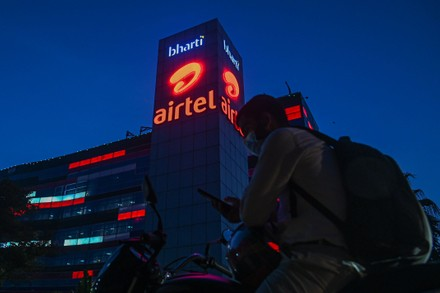

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import accuracy_score
from sklearn import metrics
plt.style.use('bmh')

In [2]:
# Load the data
airtel=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\BHARTIAIRTEL.csv")

In [3]:
airtel.head()

,Symbol,Series,Date,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No. of_Trades,Deliverable_Qty,% Dly Qt to_Traded_Qty
0,BHARTIARTL,EQ,04-11-2022,818.65,815.70,821.80,809.20,816.10,816.40,814.59,3768226,3.069542e+09,90470,2243180,59.53
1,BHARTIARTL,BL,03-11-2022,802.10,809.85,809.85,809.85,809.85,809.85,809.85,3400871,2.754195e+09,1,-,-
2,BHARTIARTL,EQ,03-11-2022,809.85,809.75,824.40,804.20,817.50,818.65,817.78,5897840,4.823129e+09,160802,3380905,57.32
3,BHARTIARTL,EQ,31-10-2022,816.85,823.00,833.80,820.00,832.00,832.00,829.27,5487233,4.550408e+09,166517,3411499,62.17
4,BHARTIARTL,EQ,28-10-2022,817.10,819.00,824.40,811.30,819.50,816.85,816.70,3905093,3.189280e+09,106794,1890500,67.1


In [4]:
#to see the last five rows
airtel.tail()

,Symbol,Series,Date,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No. of_Trades,Deliverable_Qty,% Dly Qt to_Traded_Qty
1738,BHARTIARTL,EQ,16-11-2015,333.90,335.70,339.3,330.50,336.25,335.75,336.24,2431305,8.175022e+08,23243,1610151,66.23
1739,BHARTIARTL,EQ,13-11-2015,331.90,325.05,336.0,325.05,335.80,333.90,331.47,2505836,8.306136e+08,54187,1716487,68.5
1740,BHARTIARTL,EQ,11-11-2015,331.65,334.00,336.0,330.00,330.00,331.90,332.52,139226,4.629584e+07,2708,50772,36.47
1741,BHARTIARTL,EQ,10-11-2015,335.25,332.65,335.7,327.55,331.00,331.65,331.90,2182752,7.244542e+08,49339,1325824,60.74
1742,BHARTIARTL,EQ,09-11-2015,339.20,334.05,338.6,320.75,334.00,335.25,332.83,3272247,1.089104e+09,44277,1683863,51.46


In [5]:
# shape of dataset
airtel.shape

(1743, 15)

In [6]:
# information about dataset
airtel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1743 non-null   object 
 1   Series                  1743 non-null   object 
 2   Date                    1743 non-null   object 
 3   Prev_Close              1743 non-null   float64
 4   Open_Price              1743 non-null   float64
 5   High_Price              1743 non-null   float64
 6   Low_Price               1743 non-null   float64
 7   Last_Price              1743 non-null   float64
 8   Close_Price             1743 non-null   float64
 9   Average_Price           1743 non-null   float64
 10  Total_Traded_Quantity   1743 non-null   int64  
 11  Turnover                1743 non-null   float64
 12  No. of_Trades           1743 non-null   int64  
 13  Deliverable_Qty         1743 non-null   object 
 14  % Dly Qt to_Traded_Qty  1743 non-null   

In [7]:
#Describe of dataset
airtel.describe()

,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No. of_Trades
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1.743000e+03,1.743000e+03,1743.000000
mean,462.792570,463.739989,470.251779,456.654360,463.361102,463.348107,463.438709,9.683024e+06,4.873526e+09,110906.984509
std,141.091922,141.790809,142.983642,140.432637,141.515292,141.561104,141.745273,1.232952e+07,6.984687e+09,92117.432929
min,285.350000,283.050000,290.000000,276.850000,285.250000,285.350000,283.700000,1.210000e+05,4.629584e+07,1.000000
25%,347.575000,348.000000,352.450000,342.075000,347.825000,347.700000,347.210000,3.601146e+06,1.333616e+09,49468.500000
50%,413.900000,413.950000,420.200000,406.000000,414.000000,414.550000,414.770000,6.098125e+06,2.834897e+09,85057.000000
75%,546.500000,548.025000,555.975000,538.925000,546.925000,546.750000,547.655000,1.136872e+07,5.955222e+09,144864.500000
max,818.650000,823.000000,833.800000,820.000000,832.000000,832.000000,829.270000,1.948880e+08,1.090000e+11,946705.000000


In [8]:
# find ot null value in dataset
airtel.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev_Close                0
Open_Price                0
High_Price                0
Low_Price                 0
Last_Price                0
Close_Price               0
Average_Price             0
Total_Traded_Quantity     0
Turnover                  0
No. of_Trades             0
Deliverable_Qty           0
% Dly Qt to_Traded_Qty    0
dtype: int64

In [9]:
# index of dataset
airtel.index

RangeIndex(start=0, stop=1743, step=1)

In [10]:
    # Dtypes of dataset
    airtel.dtypes

Symbol                     object
Series                     object
Date                       object
Prev_Close                float64
Open_Price                float64
High_Price                float64
Low_Price                 float64
Last_Price                float64
Close_Price               float64
Average_Price             float64
Total_Traded_Quantity       int64
Turnover                  float64
No. of_Trades               int64
Deliverable_Qty            object
% Dly Qt to_Traded_Qty     object
dtype: object

# Visualization

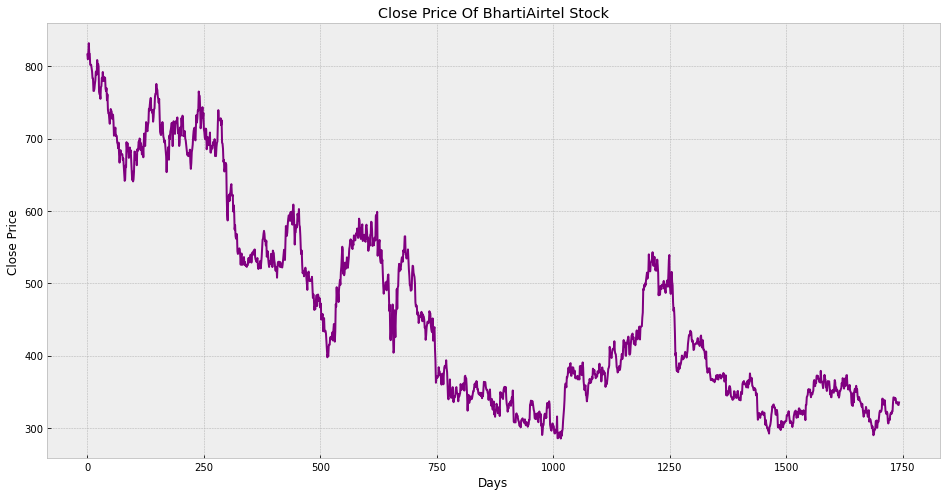

In [12]:
#line plot of open price
plt.figure(figsize=(16,8))
plt.plot(airtel['Close_Price'],color='purple')
plt.title("Close Price Of BhartiAirtel Stock")
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Model Building

In [13]:
# Get the close price
close_price=airtel[['Close_Price']]

In [14]:
close_price.head()

,Close_Price
0,816.40
1,809.85
2,818.65
3,832.00
4,816.85


In [15]:
# Create availble to predict 'X' days out into the future
future_days=100
#Create a new column (Target) shifted 'X' units/Days up
airtel['Prediction']=airtel[['Close_Price']].shift(-future_days)
airtel.tail()

,Symbol,Series,Date,Prev_Close,Open_Price,High_Price,Low_Price,Last_Price,Close_Price,Average_Price,Total_Traded_Quantity,Turnover,No. of_Trades,Deliverable_Qty,% Dly Qt to_Traded_Qty,Prediction
1738,BHARTIARTL,EQ,16-11-2015,333.90,335.70,339.3,330.50,336.25,335.75,336.24,2431305,8.175022e+08,23243,1610151,66.23,NaN
1739,BHARTIARTL,EQ,13-11-2015,331.90,325.05,336.0,325.05,335.80,333.90,331.47,2505836,8.306136e+08,54187,1716487,68.5,NaN
1740,BHARTIARTL,EQ,11-11-2015,331.65,334.00,336.0,330.00,330.00,331.90,332.52,139226,4.629584e+07,2708,50772,36.47,NaN
1741,BHARTIARTL,EQ,10-11-2015,335.25,332.65,335.7,327.55,331.00,331.65,331.90,2182752,7.244542e+08,49339,1325824,60.74,NaN
1742,BHARTIARTL,EQ,09-11-2015,339.20,334.05,338.6,320.75,334.00,335.25,332.83,3272247,1.089104e+09,44277,1683863,51.46,NaN


In [17]:
airtel.drop(columns=['Symbol','Series','Date','Deliverable_Qty','% Dly Qt to_Traded_Qty'],axis=1,inplace=True)

In [18]:
# Create the feature data set(X) and convert it to a numpy array and remove the last 'X' rows/days
X=np.array(airtel.drop(['Prediction'],1))[:-future_days]
print(X)

[[8.18650000e+02 8.15700000e+02 8.21800000e+02 ... 3.76822600e+06
  3.06954204e+09 9.04700000e+04]
 [8.02100000e+02 8.09850000e+02 8.09850000e+02 ... 3.40087100e+06
  2.75419538e+09 1.00000000e+00]
 [8.09850000e+02 8.09750000e+02 8.24400000e+02 ... 5.89784000e+06
  4.82312913e+09 1.60802000e+05]
 ...
 [3.31250000e+02 3.31950000e+02 3.37400000e+02 ... 2.09050800e+06
  6.91337879e+08 3.58890000e+04]
 [3.34500000e+02 3.36100000e+02 3.36300000e+02 ... 2.17720900e+06
  7.22273901e+08 2.72470000e+04]
 [3.30500000e+02 3.33450000e+02 3.39550000e+02 ... 2.73720600e+06
  9.18436638e+08 4.54250000e+04]]


C:\Users\Pranav\AppData\Local\Temp\ipykernel_6820\4120554762.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(airtel.drop(['Prediction'],1))[:-future_days]


In [19]:
#Create the Target dataset(y) and convert it to a numpy array and get all of the target values expect the last 'X' rows/days
y=np.array(airtel['Prediction'])[:-future_days]
print(y)

[654.2  682.1  682.05 ... 331.9  331.65 335.25]


In [20]:
# split the data into 75% training and 25% testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print("shape of x_train= ",X_train.shape)
print("shape of x_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of x_train=  (1232, 10)
shape of x_test=  (411, 10)
shape of y_train=  (1232,)
shape of y_test=  (411,)


In [21]:
# Create the model 
#Create the Decision tree model 
tree=DecisionTreeRegressor()

In [22]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
# Traing LinearRegression model
lr=LinearRegression()

In [24]:
#Fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
# get the last 'X' rows of the feature data set
X_future=airtel.drop(['Prediction'],1)[:-future_days]
X_future=X_future.tail(future_days)
X_future=np.array(X_future)
X_future

C:\Users\Pranav\AppData\Local\Temp\ipykernel_6820\856728018.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_future=airtel.drop(['Prediction'],1)[:-future_days]


array([[3.42600000e+02, 3.42750000e+02, 3.44100000e+02, 3.28750000e+02,
        3.32050000e+02, 3.31850000e+02, 3.33420000e+02, 4.04418900e+06,
        1.34840856e+09, 7.81310000e+04],
       [3.43950000e+02, 3.43500000e+02, 3.47750000e+02, 3.35250000e+02,
        3.40900000e+02, 3.42600000e+02, 3.41770000e+02, 2.54903100e+06,
        8.71185362e+08, 4.82550000e+04],
       [3.46000000e+02, 3.47500000e+02, 3.48100000e+02, 3.41550000e+02,
        3.43600000e+02, 3.43950000e+02, 3.44080000e+02, 1.12724600e+06,
        3.87863910e+08, 2.84000000e+04],
       [3.52600000e+02, 3.51250000e+02, 3.54000000e+02, 3.44100000e+02,
        3.50300000e+02, 3.46000000e+02, 3.47150000e+02, 3.22935200e+06,
        1.12106180e+09, 3.09210000e+04],
       [3.53750000e+02, 3.54000000e+02, 3.58350000e+02, 3.50000000e+02,
        3.52250000e+02, 3.52600000e+02, 3.53660000e+02, 1.63125000e+06,
        5.76909700e+08, 5.50130000e+04],
       [3.50200000e+02, 3.48000000e+02, 3.55400000e+02, 3.44700000e+02,
   

In [26]:
# show the model tree prediction 
tree_prediction=tree.predict(X_future)
print(tree_prediction)

[330.5  309.9  335.45 350.8  353.8  354.5  349.8  358.2  350.9  353.65
 344.3  340.75 338.5  342.9  305.6  337.25 336.3  334.6  331.5  329.25
 323.45 326.35 337.7  315.5  311.   428.95 321.3  321.3  422.5  326.05
 321.2  342.2  318.5  318.9  324.55 308.7  311.3  312.25 311.   353.3
 304.25 320.35 302.2  296.6  289.9  337.25 318.9  297.5  298.7  309.3
 309.6  310.3  300.25 306.1  306.55 308.6  339.   321.15 323.85 322.35
 322.2  323.45 326.8  340.5  322.7  333.1  335.25 331.75 338.45 358.2
 323.2  320.9  319.05 322.4  320.35 309.2  306.15 408.75 321.3  310.85
 317.85 320.1  321.3  319.55 322.9  344.   498.15 342.2  342.15 337.75
 339.   341.35 339.55 326.8  333.1  335.75 333.9  331.9  331.65 335.25]


In [27]:
# show the linear regression predction
lr_prediction=lr.predict(X_future)
print(lr_prediction)

[340.36669946 348.05589349 352.32463748 349.51683749 356.5909361
 355.41587347 356.02917778 359.34196067 355.63339457 351.5673155
 349.30698278 356.07189542 358.94300184 350.66403548 355.59876097
 356.18725469 364.73160725 363.06203549 364.9068621  361.6333194
 367.52499791 367.24309833 370.64725247 369.66620904 373.25719327
 370.15327869 371.72192668 369.37653639 368.26216058 363.99525772
 359.43398705 367.93417068 368.72519764 368.82895097 366.94428652
 359.29212015 362.17582951 362.63246908 369.47650524 370.97731972
 366.14807514 360.53656395 361.84851255 360.18157178 357.09405676
 365.2943236  370.80711753 365.99772068 368.50251628 361.30547739
 353.2351765  354.76574007 354.24875483 352.89095154 350.5224507
 357.20263242 356.78422827 354.85206266 357.76951062 354.60485156
 364.28205703 367.78463611 357.17790638 367.30674425 360.31546157
 354.14004387 359.27829193 355.0867927  354.69664227 349.97065921
 351.44272169 351.2794067  359.68327885 352.92586188 358.28433169
 362.19991307 

# Visualization

C:\Users\Pranav\AppData\Local\Temp\ipykernel_6820\166708353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


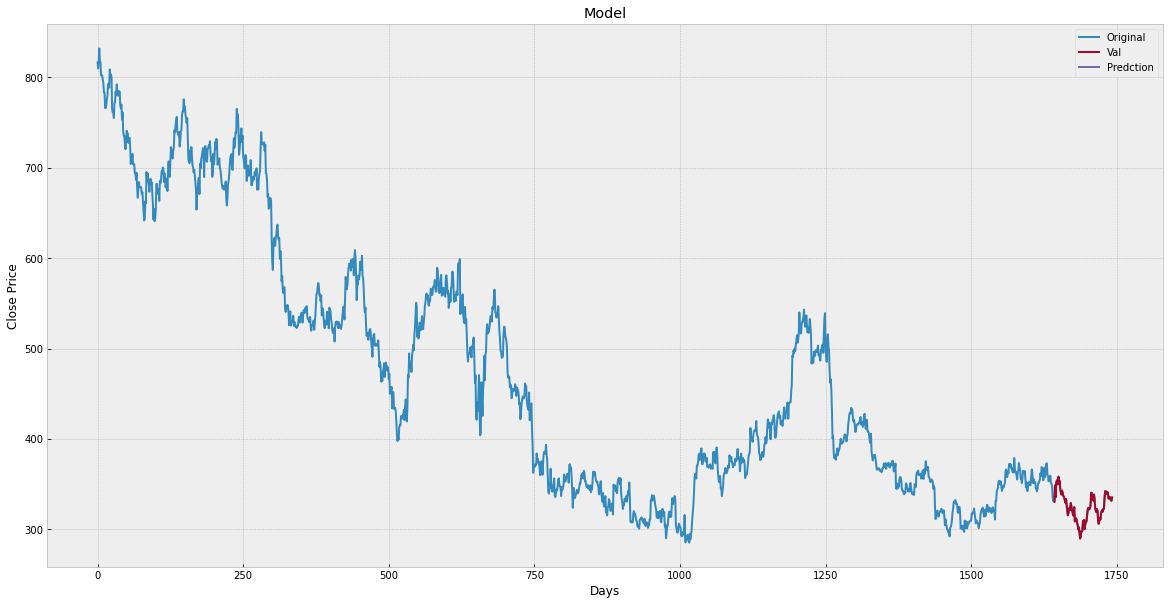

In [29]:
predictions=tree_prediction

valid=airtel[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(airtel['Close_Price'])
plt.plot(valid[['Close_Price','Prediction']])
plt.legend(['Original','Val','Predction'])
plt.show()

C:\Users\Pranav\AppData\Local\Temp\ipykernel_6820\3792894142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


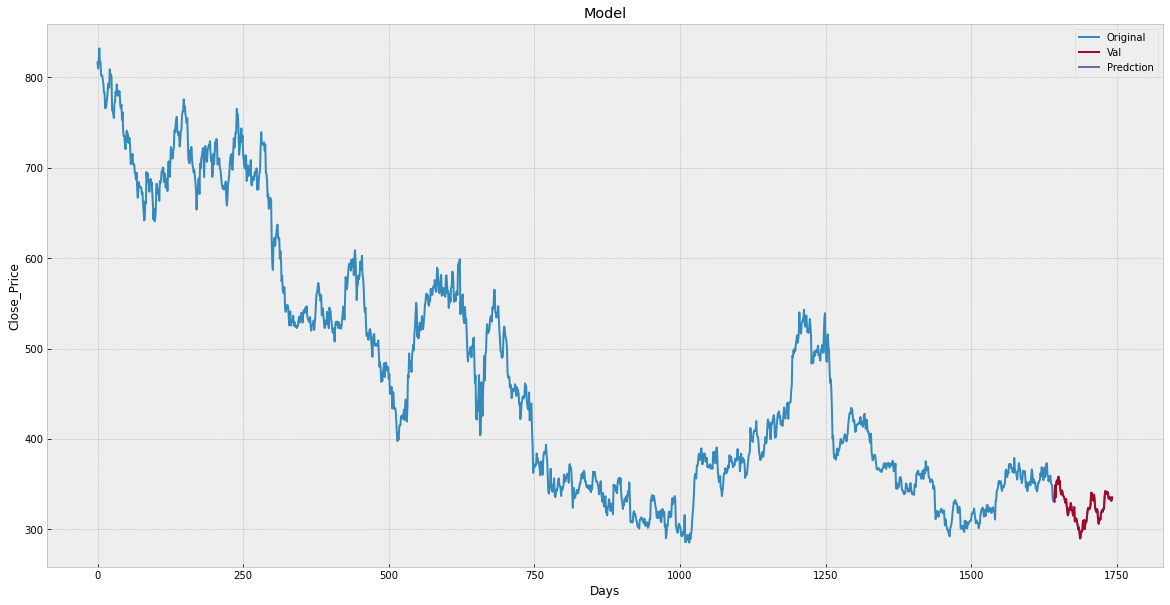

In [30]:
predictions=lr_prediction

valid=airtel[X.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close_Price')
plt.plot(airtel['Close_Price'])
plt.plot(valid[['Close_Price','Prediction']])
plt.legend(['Original','Val','Predction'])
plt.show()